<a href="https://colab.research.google.com/github/Aleena24/CV_lab/blob/main/lab4_Linear_Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [56]:
image = cv2.imread("/content/drive/MyDrive/research_dataset/BSD100/148089.png")

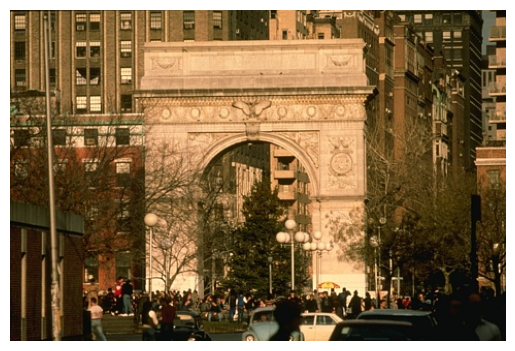

In [57]:
# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Average Filter


In [58]:
def non_linear_average_filter(image, window_size):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Pad the image to handle borders
    padded_image = cv2.copyMakeBorder(image, window_size // 2, window_size // 2, window_size // 2, window_size // 2, cv2.BORDER_CONSTANT)

    # Create an output image with the same dimensions as the input image
    output_image = np.zeros_like(image)

    # Apply the non-linear average filter
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+window_size, j:j+window_size]
            median_value = np.median(window)
            output_image[i, j] = median_value

    return output_image


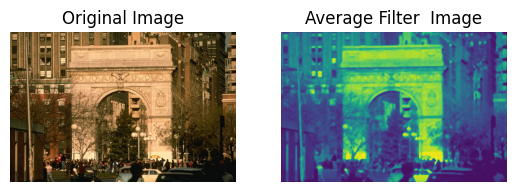

In [59]:
# Define the window size for the filter
window_size = 5

# Apply the non-linear average filter
average_image = non_linear_average_filter(image, window_size)

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(average_image)
plt.title('Average Filter  Image')
plt.axis('off')

plt.show()


# Gaussian Blur

In [60]:
def gaussian_blur_nonlinear(image, kernel_size=(5, 5), sigma=1.0):

    # Create Gaussian kernel
    kernel = cv2.getGaussianKernel(kernel_size[0], sigma)about:blank#blocked
    kernel = np.outer(kernel, kernel.transpose())

    # Apply non-linear spatial filtering
    blurred_image = cv2.filter2D(image, -1, kernel)

    return blurred_image

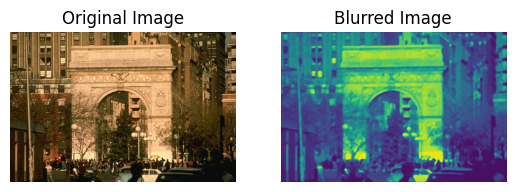

In [61]:
# Define the window size for the filter
window_size = 5

# Apply the non-linear average filter
blurred_image = non_linear_average_filter(image, window_size)

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

plt.show()

# Sharpening Filtering

In [62]:
def sharpen_image(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Laplacian filter
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

    # Convert back to uint8
    sharpened_image = np.uint8(np.clip(gray_image - 0.5 * laplacian, 0, 255))

    return sharpened_image

In [63]:
# Define the window size for the filter
window_size = 5

# Apply the non-linear average filter
sharpened_image = non_linear_average_filter(image, window_size)

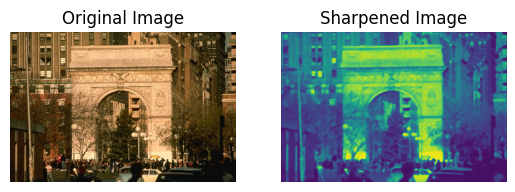

In [64]:
# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.axis('off')

plt.show()